Nernay Kumar
Intern Id 
INT2026-9021

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the dataset
df = pd.read_csv('Marketing_Campaign_Data.csv')

print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Head:
         Date CampaignID CampaignName Platform TargetAudience  Impressions  Clicks  Leads  Applications  Enrollments   Cost (₹)  Revenue (₹)       Region
0  2024-01-01      AD004    Hackathon  YouTube      17–21 Age       285708   16956   4087          2547         1148  ₹ 275,458  ₹ 4,615,838   West India
1  2024-01-02      AD004    Hackathon  YouTube      17–21 Age       140449   10082   1815           951          565  ₹ 133,026  ₹ 3,513,170  North India
2  2024-01-03      AD004    Hackathon  YouTube      17–21 Age       140958    7474   1169           683          343  ₹ 135,766  ₹ 1,051,925  North India
3  2024-01-04      AD004    Hackathon  YouTube      22–27 Age       257823   16841   3179          1584          698  ₹ 229,715  ₹ 3,850,640   West India
4  2024-01-05      AD004    Hackathon  YouTube      25–35 Age        98595    7293   1340           854          368   ₹ 52,361  ₹ 1,543,263   West India

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [29]:
# Initial Data Cleaning and Exploration

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
if df.duplicated().any():
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

# Check for missing values (already done in initial load, but good to re-confirm after cleaning)
print("\nMissing values after initial cleaning:")
print(df.isnull().sum())

print("\nDataFrame after initial cleaning steps:")
df.info()


Number of duplicate rows: 0

Missing values after initial cleaning:
Date              0
CampaignID        0
CampaignName      0
Platform          0
TargetAudience    0
Impressions       0
Clicks            0
Leads             0
Applications      0
Enrollments       0
Cost (₹)          0
Revenue (₹)       0
Region            0
dtype: int64

DataFrame after initial cleaning steps:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            763 non-null    datetime64[ns]
 1   CampaignID      763 non-null    object        
 2   CampaignName    763 non-null    object        
 3   Platform        763 non-null    object        
 4   TargetAudience  763 non-null    object        
 5   Impressions     763 non-null    int64         
 6   Clicks          763 non-null    int64         
 7   Leads           763 non-null    int64  

In [30]:
# Data Cleaning: Clean 'Cost (₹)' and 'Revenue (₹)' columns

# Remove '₹' symbol and commas, then convert to numeric
df['Cost'] = df['Cost (₹)'].str.replace('₹', '').str.replace(',', '').astype(float)
df['Revenue'] = df['Revenue (₹)'].str.replace('₹', '').str.replace(',', '').astype(float)

# Drop original currency columns if desired
df.drop(columns=['Cost (₹)', 'Revenue (₹)'], inplace=True)

print("\nDataFrame after cleaning Cost and Revenue columns:")
df.info()
print(df[['Cost', 'Revenue']].head())


DataFrame after cleaning Cost and Revenue columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            763 non-null    datetime64[ns]
 1   CampaignID      763 non-null    object        
 2   CampaignName    763 non-null    object        
 3   Platform        763 non-null    object        
 4   TargetAudience  763 non-null    object        
 5   Impressions     763 non-null    int64         
 6   Clicks          763 non-null    int64         
 7   Leads           763 non-null    int64         
 8   Applications    763 non-null    int64         
 9   Enrollments     763 non-null    int64         
 10  Region          763 non-null    object        
 11  Cost            763 non-null    float64       
 12  Revenue         763 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memo

In [31]:
# Create EngagementRate column

# Calculate EngagementRate = (Clicks / Impressions) * 100
df['EngagementRate'] = (df['Clicks'] / df['Impressions']) * 100

# Handle potential NaN values from division by zero (if Impressions was 0)
df['EngagementRate'] = df['EngagementRate'].fillna(0)

print("\nDataFrame with new EngagementRate column:")
print(df[['Impressions', 'Clicks', 'EngagementRate']].head())


DataFrame with new EngagementRate column:
   Impressions  Clicks  EngagementRate
0       285708   16956        5.934731
1       140449   10082        7.178406
2       140958    7474        5.302289
3       257823   16841        6.532001
4        98595    7293        7.396927


Average revenue per campaign: $2,838,089.89


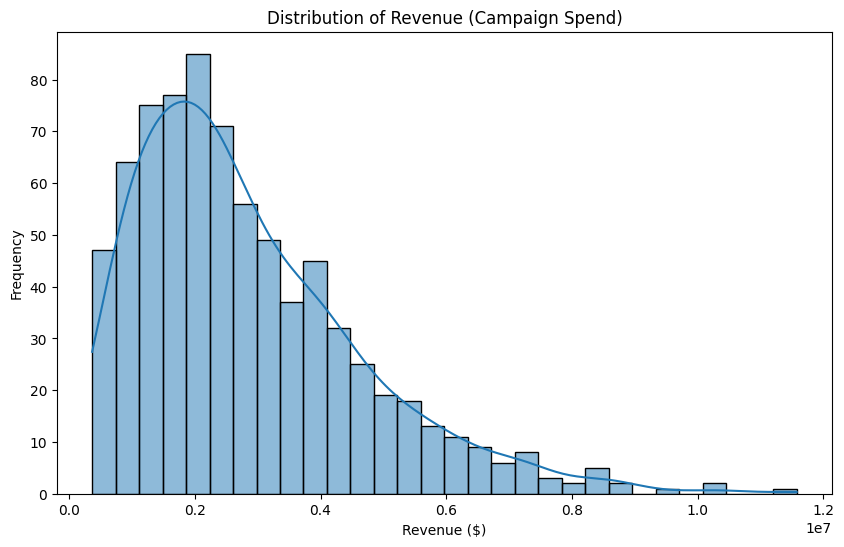

In [32]:
# 1. Calculate average spending per customer

average_revenue = df['Revenue'].mean()
print(f"Average revenue per campaign: ${average_revenue:,.2f}")

# Visualization: Distribution of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], kde=True, bins=30)
plt.title('Distribution of Revenue (Campaign Spend)')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.show()

Top 10% Spenders (first 5 rows):
          Date CampaignID               CampaignName    Platform TargetAudience  Impressions  Clicks  Leads  Applications  Enrollments       Region      Cost     Revenue  EngagementRate
483 2025-02-25      AD003                 Placements    LinkedIn      17–21 Age       298028   20642   4696          2781         1630   East India  284889.0  11577296.0        6.926195
573 2025-05-13      AD003                 Placements    LinkedIn      22–27 Age       263989   20499   4960          3112         1581   East India  241711.0  10422583.0        7.765096
318 2024-09-13      AD005  Semester Exchange Program   Instagram      25–35 Age       288944   22296   3936          2456         1336  North India  268441.0  10200619.0        7.716374
738 2025-10-07      AD002              MBA Admission    Facebook      21–35 Age       229002   17513   3683          2365         1189   East India  161078.0   9344119.0        7.647531
235 2024-07-23      AD001            

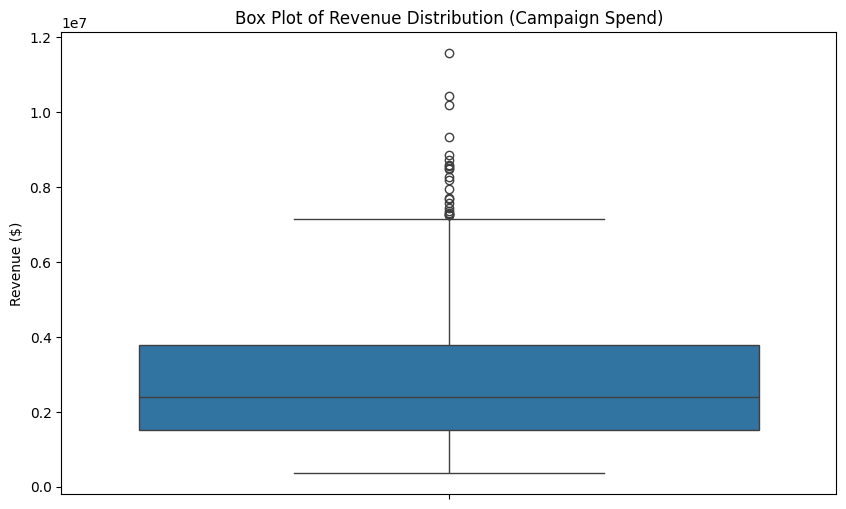

In [33]:
# 2. Identify top 10% of spenders

# Assuming each row represents a customer or a campaign for simplicity.
# Sort by Revenue in descending order and get the top 10%
top_10_percent_spenders = df.sort_values(by='Revenue', ascending=False).head(int(len(df) * 0.10))

print("Top 10% Spenders (first 5 rows):")
print(top_10_percent_spenders.head())

# Visualization: Box plot of Revenue to show high spenders
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Revenue'])
plt.title('Box Plot of Revenue Distribution (Campaign Spend)')
plt.ylabel('Revenue ($)')
plt.show()

Skewness of Clicks: 0.70
Skewness of Engagement Rate: -0.01


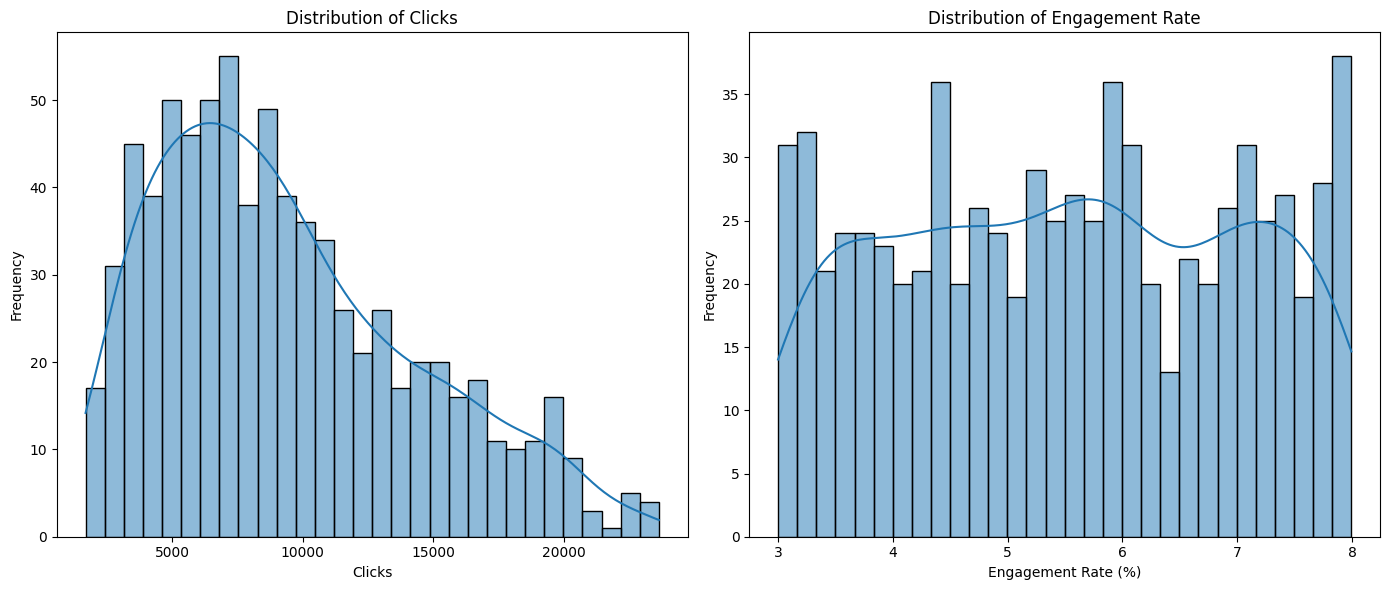

In [34]:
# 3. Detect skewness in customer engagement metrics

# Calculate skewness for Clicks and EngagementRate
clicks_skewness = df['Clicks'].skew()
engagement_rate_skewness = df['EngagementRate'].skew()

print(f"Skewness of Clicks: {clicks_skewness:.2f}")
print(f"Skewness of Engagement Rate: {engagement_rate_skewness:.2f}")

# Interpretation of skewness:
# - Skewness > 0: Positively skewed (right-skewed), tail on the right
# - Skewness < 0: Negatively skewed (left-skewed), tail on the left
# - Skewness ≈ 0: Approximately symmetrical

# Visualization: Histograms to show skewness of Clicks and EngagementRate
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Clicks'], kde=True, bins=30)
plt.title('Distribution of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['EngagementRate'], kde=True, bins=30)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()